In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/Jylians/introduc/refs/heads/main/Base_limpia.csv')

In [36]:
df = df.drop(columns=["Unnamed: 0"])
df


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False
128972,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False
128973,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False
128974,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False


In [8]:
# Obtener información general del DataFrame
df_info = df.info()

# Mostrar una muestra de los datos
df_sample = df.head()

# Resumen estadístico de las variables numéricas
df_describe = df.describe()

# Resumen de las variables categóricas
df_categoricals = df.select_dtypes(include=['object']).describe()

df_info, df_sample, df_describe, df_categoricals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

(None,
               Order ID      Date                        Status Fulfilment  \
 0  405-8078784-5731545  04-30-22                     Cancelled   Merchant   
 1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   Merchant   
 2  404-0687676-7273146  04-30-22                       Shipped     Amazon   
 3  403-9615377-8133951  04-30-22                     Cancelled   Merchant   
 4  407-1069790-7240320  04-30-22                       Shipped     Amazon   
 
   Sales Channel ship-service-level  Category Size Courier Status  Qty  \
 0     Amazon.in           Standard   T-shirt    S     On the Way    0   
 1     Amazon.in           Standard     Shirt  3XL        Shipped    1   
 2     Amazon.in          Expedited     Shirt   XL        Shipped    1   
 3     Amazon.in           Standard   Blazzer    L     On the Way    0   
 4     Amazon.in          Expedited  Trousers  3XL        Shipped    1   
 
   currency  Amount    ship-city   ship-state  ship-postal-code ship-country 

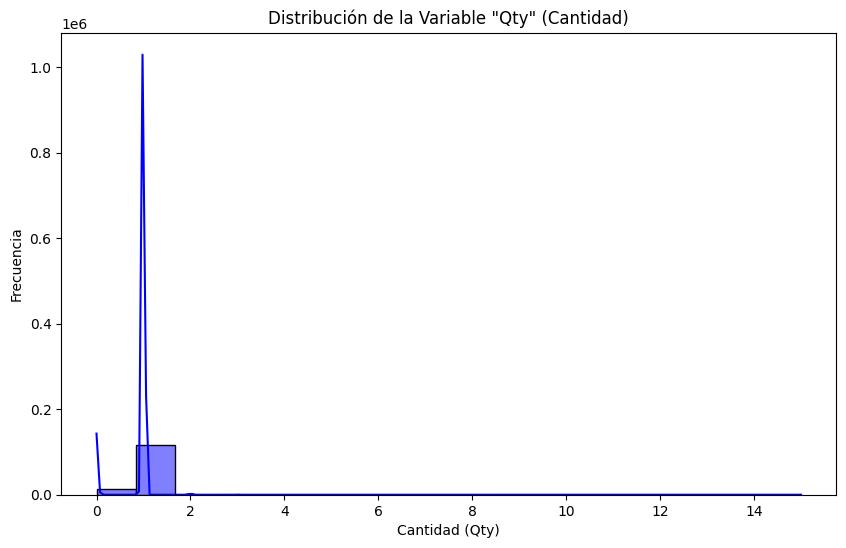

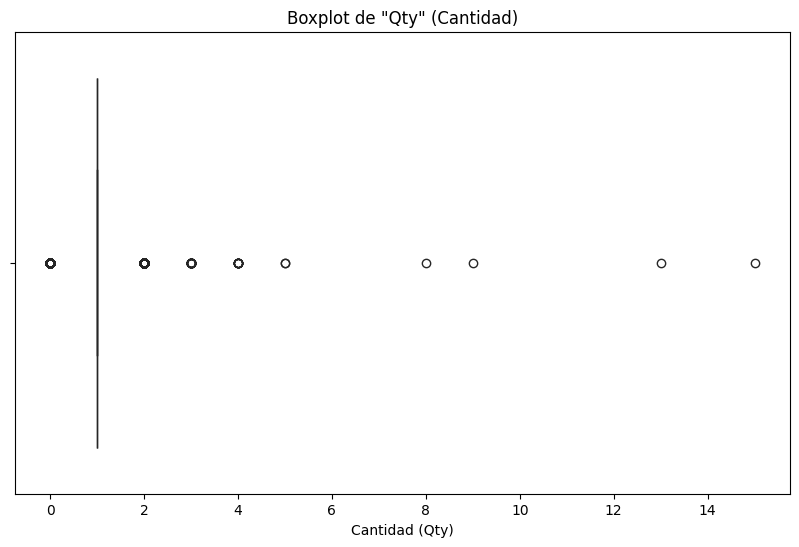

In [9]:
# Histograma de 'Qty' (Cantidad)
plt.figure(figsize=(10, 6))
sns.histplot(df['Qty'], kde=True, color='blue')
plt.title('Distribución de la Variable "Qty" (Cantidad)')
plt.xlabel('Cantidad (Qty)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de 'Qty' (Cantidad)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Qty', color='green')
plt.title('Boxplot de "Qty" (Cantidad)')
plt.xlabel('Cantidad (Qty)')
plt.show()

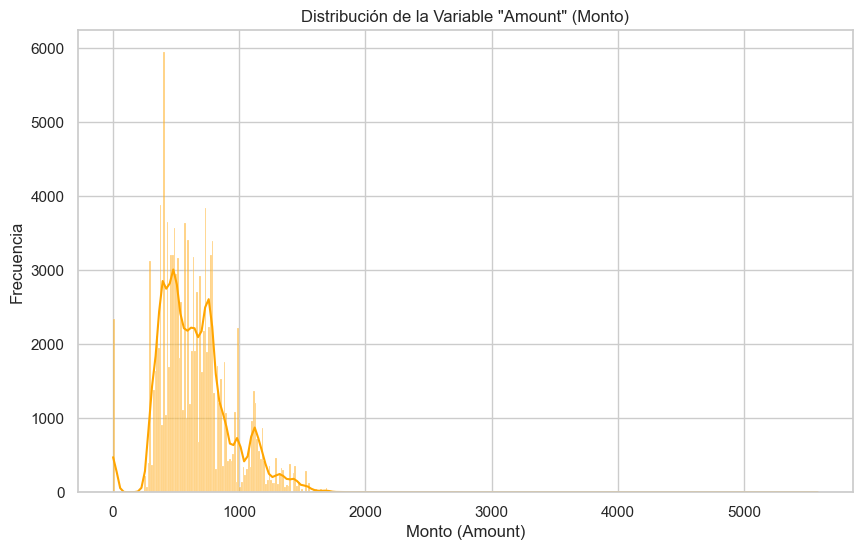

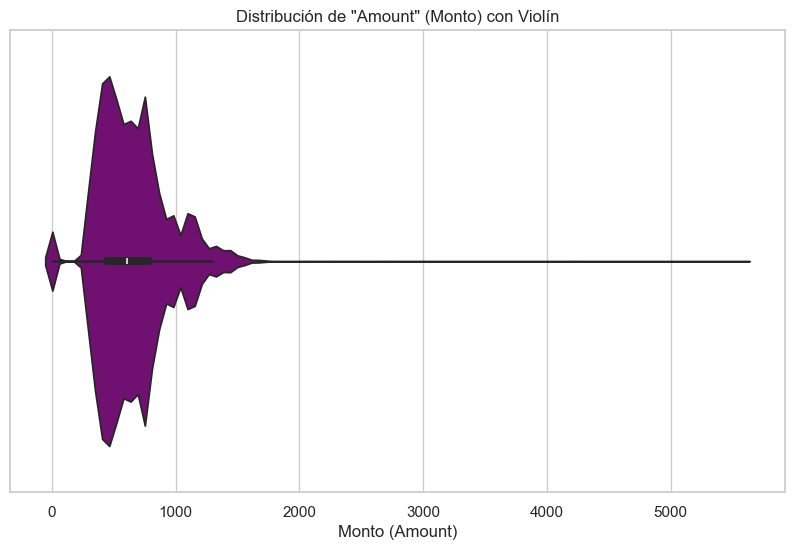

In [74]:
# Histograma de 'Amount' (Monto)
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], kde=True, color='orange')
plt.title('Distribución de la Variable "Amount" (Monto)')
plt.xlabel('Monto (Amount)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de Violín de 'Amount' (Monto)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Amount', color='purple')
plt.title('Distribución de "Amount" (Monto) con Violín')
plt.xlabel('Monto (Amount)')
plt.show()


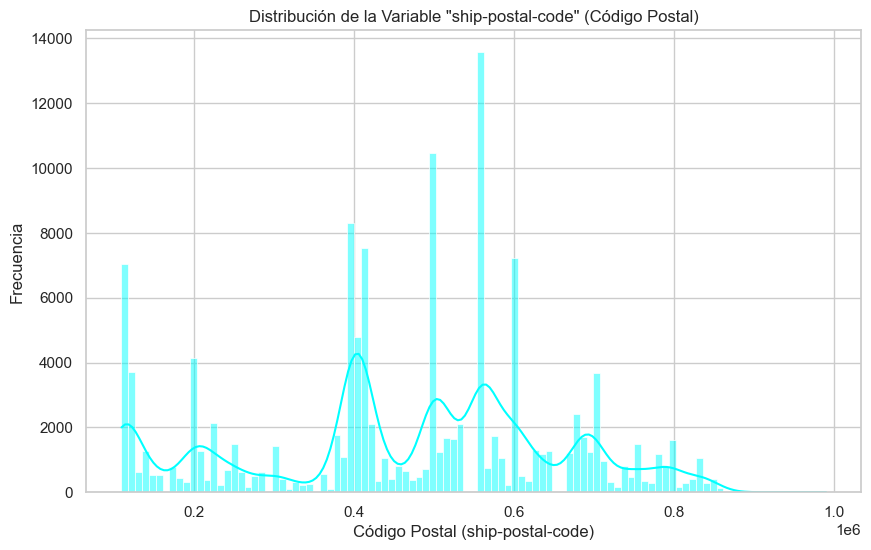

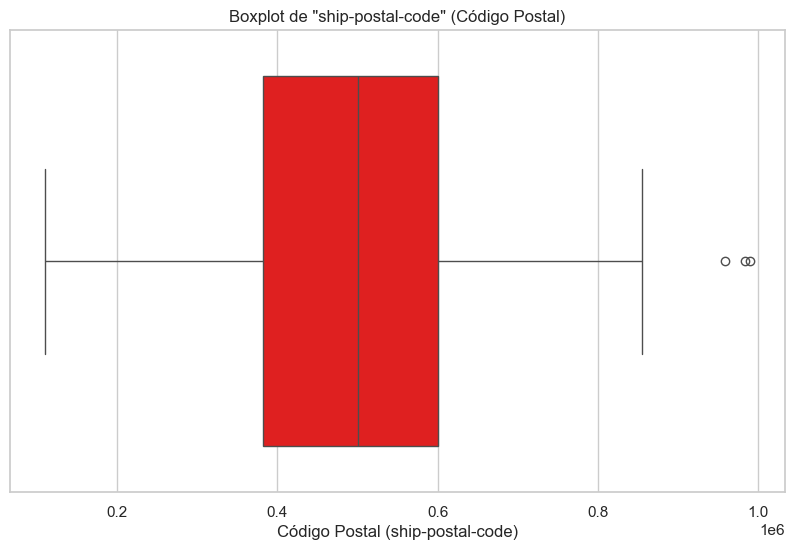

In [75]:
# Histograma de 'ship-postal-code' (Código Postal)
plt.figure(figsize=(10, 6))
sns.histplot(df['ship-postal-code'], kde=True, color='cyan')
plt.title('Distribución de la Variable "ship-postal-code" (Código Postal)')
plt.xlabel('Código Postal (ship-postal-code)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de 'ship-postal-code' (Código Postal)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ship-postal-code', color='red')
plt.title('Boxplot de "ship-postal-code" (Código Postal)')
plt.xlabel('Código Postal (ship-postal-code)')
plt.show()


C:\Users\julia\AppData\Local\Temp\ipykernel_11304\1611061559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='Set2')


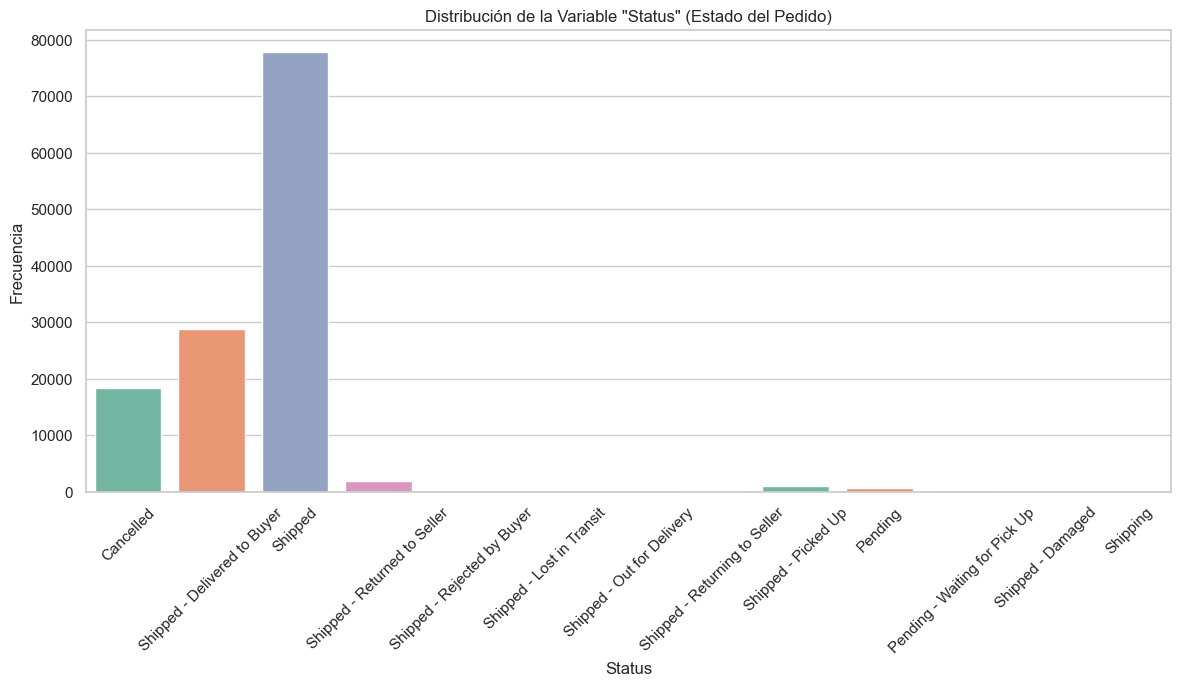

In [76]:
# Gráfico de Barras para 'Status' (Estado del pedido)
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Status', palette='Set2')
plt.title('Distribución de la Variable "Status" (Estado del Pedido)')
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


C:\Users\julia\AppData\Local\Temp\ipykernel_11304\2625041383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set3')


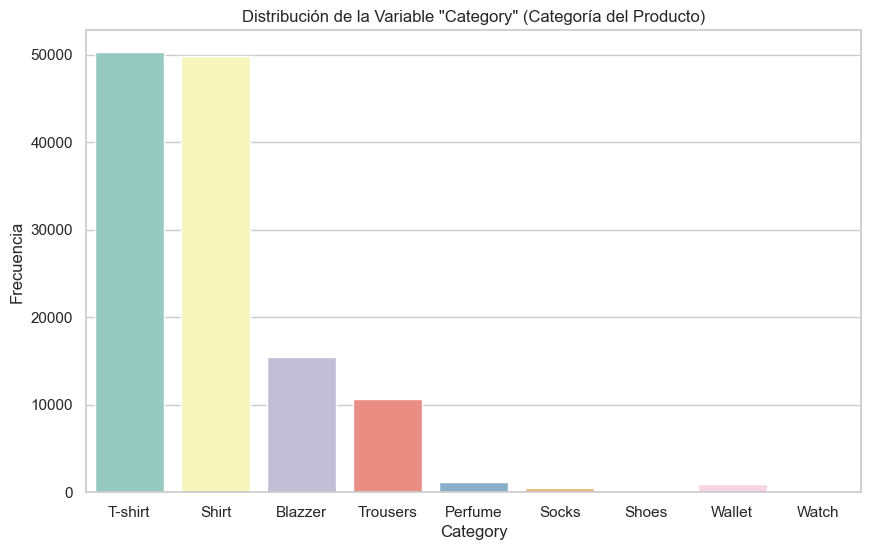

In [77]:
# Gráfico de Barras para 'Category' (Categoría del producto)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', palette='Set3')
plt.title('Distribución de la Variable "Category" (Categoría del Producto)')
plt.xlabel('Category')
plt.ylabel('Frecuencia')
plt.show()


C:\Users\julia\AppData\Local\Temp\ipykernel_14976\3494581180.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Size', palette='Set1', order=sorted(size_order, key=size_order.get))


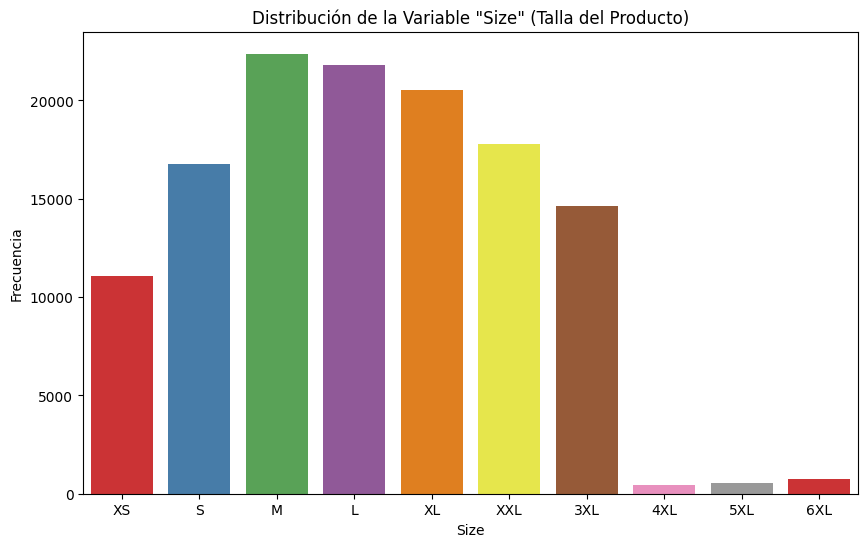

In [16]:
# Definir un diccionario que asocia cada talla con un valor numérico
size_order = {
    'XS': 1, 
    'S': 2, 
    'M': 3, 
    'L': 4, 
    'XL': 5, 
    'XXL': 6, 
    '3XL': 7, 
    '4XL': 8, 
    '5XL': 9, 
    '6XL': 10, 
}

# Crear una nueva columna en el dataframe que contenga el valor numérico de cada talla
df['Size_order'] = df['Size'].map(size_order)

# Gráfico de Barras para 'Size' (Talla del Producto) ordenado de menor a mayor por talla
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Size', palette='Set1', order=sorted(size_order, key=size_order.get))
plt.title('Distribución de la Variable "Size" (Talla del Producto)')
plt.xlabel('Size')
plt.ylabel('Frecuencia')
plt.show()


C:\Users\julia\AppData\Local\Temp\ipykernel_14976\741827071.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Courier Status', palette='Set2')


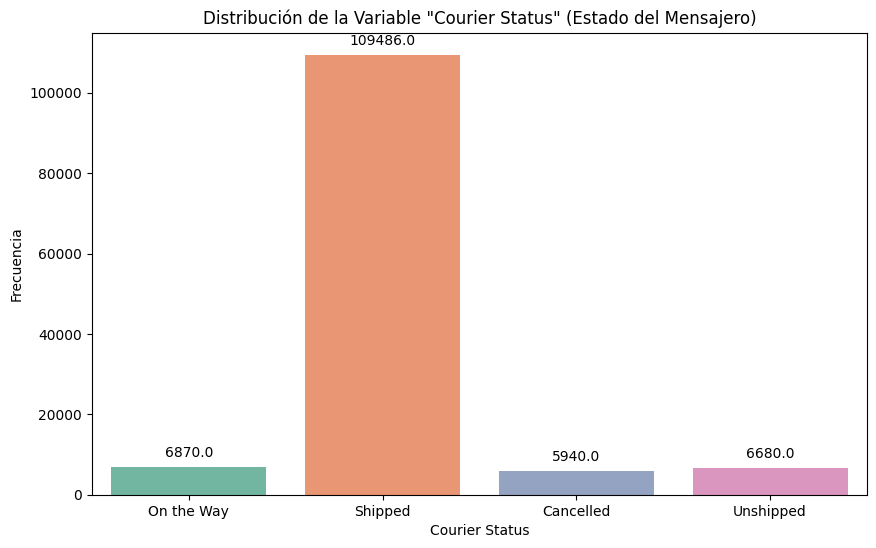

In [17]:
# Aseguramos que la columna 'Courier Status' esté en el formato correcto.
df['Courier Status'] = df['Courier Status'].astype(str)

# Gráfico de Barras para la distribución de 'Courier Status' (Estado del mensajero)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Courier Status', palette='Set2')

# Título y etiquetas
plt.title('Distribución de la Variable "Courier Status" (Estado del Mensajero)')
plt.xlabel('Courier Status')
plt.ylabel('Frecuencia')

# Añadir anotaciones en las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       fontsize=10, color='black', 
                       xytext=(0, 10), textcoords='offset points')

# Mostrar la gráfica
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_11304\3074569521.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cancelled, y='Category', order=cancelled['Category'].value_counts().index, palette='coolwarm')


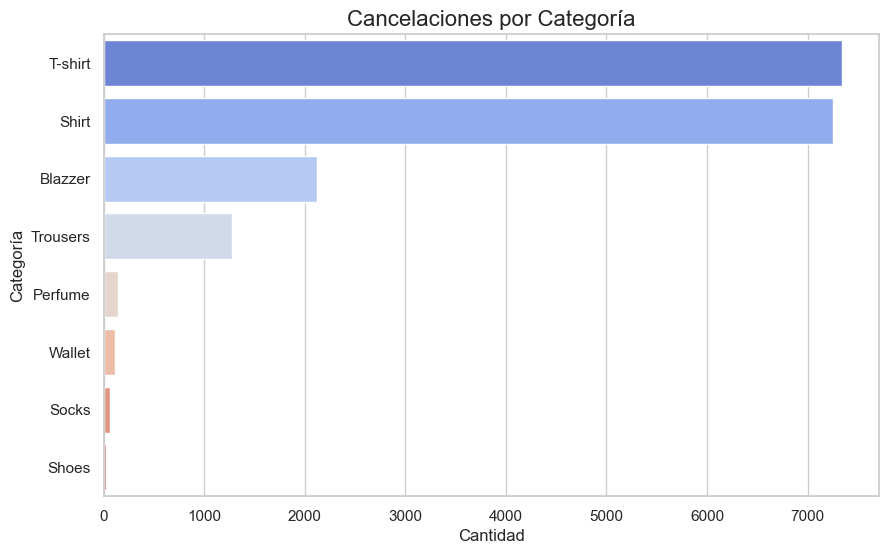

In [80]:
# 2. Cancelaciones por categoría de producto
cancelled = df[df['Status'] == 'Cancelled']
plt.figure(figsize=(10, 6))
sns.countplot(data=cancelled, y='Category', order=cancelled['Category'].value_counts().index, palette='coolwarm')
plt.title('Cancelaciones por Categoría', fontsize=16)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_11304\2196779994.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cancelled, y='ship-state', order=cancelled['ship-state'].value_counts().index[:10], palette='pastel')


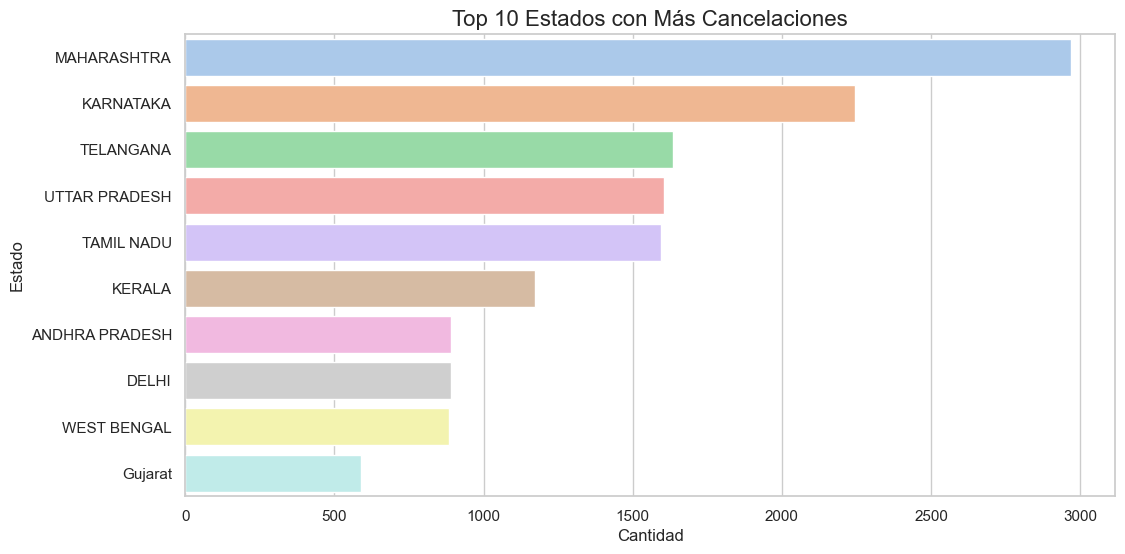

In [81]:
# 3. Cancelaciones por estado (ship-state)
plt.figure(figsize=(12, 6))
sns.countplot(data=cancelled, y='ship-state', order=cancelled['ship-state'].value_counts().index[:10], palette='pastel')
plt.title('Top 10 Estados con Más Cancelaciones', fontsize=16)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_11304\3227585373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cancelled, x='Fulfilment', palette='muted')


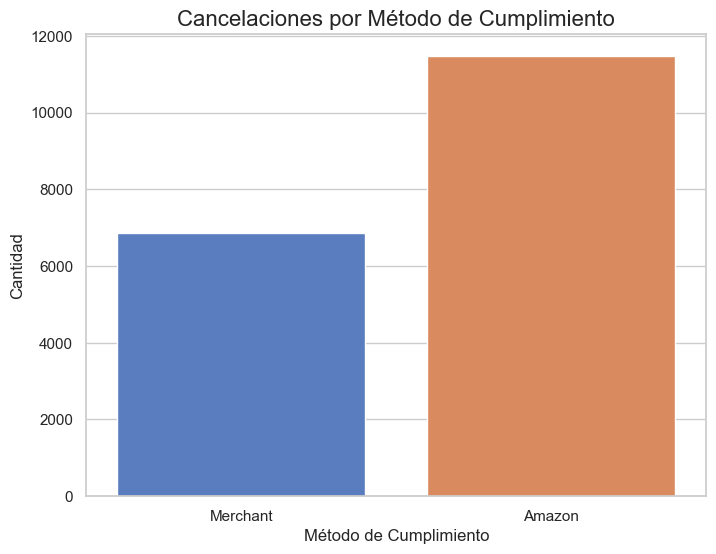

In [82]:
# 4. Relación entre método de cumplimiento (Fulfilment) y cancelaciones
plt.figure(figsize=(8, 6))
sns.countplot(data=cancelled, x='Fulfilment', palette='muted')
plt.title('Cancelaciones por Método de Cumplimiento', fontsize=16)
plt.xlabel('Método de Cumplimiento', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_11304\759209998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Amount', showfliers=False, palette='Set2')


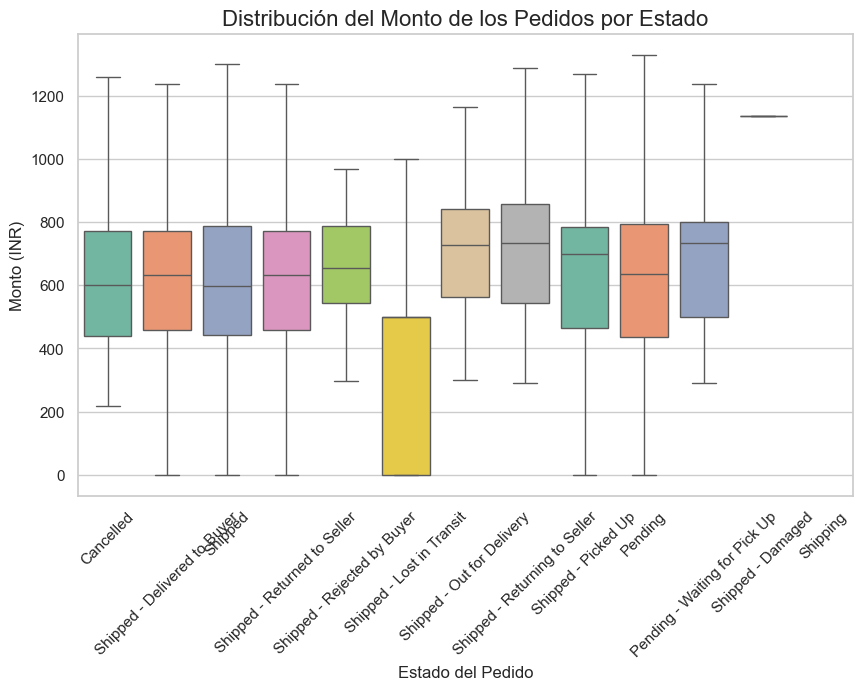

In [85]:
# 5. Comparación de montos entre pedidos cancelados y completados
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # Asegurarse de que Amount sea numérico
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Status', y='Amount', showfliers=False, palette='Set2')
plt.title('Distribución del Monto de los Pedidos por Estado', fontsize=16)
plt.xlabel('Estado del Pedido', fontsize=12)
plt.ylabel('Monto (INR)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_11304\1156706686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cancelled, x='ship-service-level', order=cancelled['ship-service-level'].value_counts().index, palette='Blues')


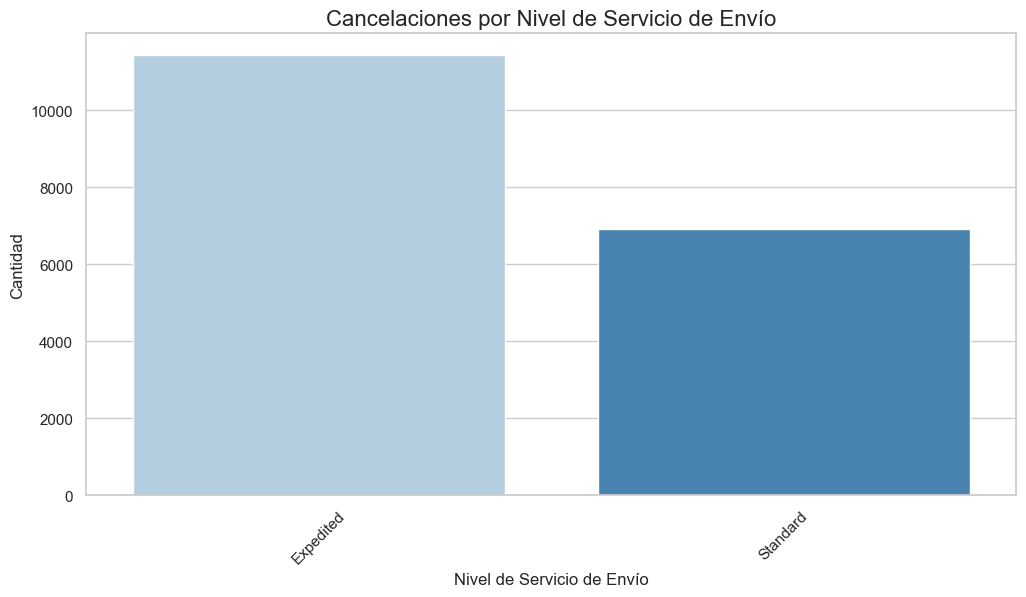

In [86]:
# 6. Cancelaciones por nivel de servicio de envío (ship-service-level)
plt.figure(figsize=(12, 6))
sns.countplot(data=cancelled, x='ship-service-level', order=cancelled['ship-service-level'].value_counts().index, palette='Blues')
plt.title('Cancelaciones por Nivel de Servicio de Envío', fontsize=16)
plt.xlabel('Nivel de Servicio de Envío', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45)
plt.show()

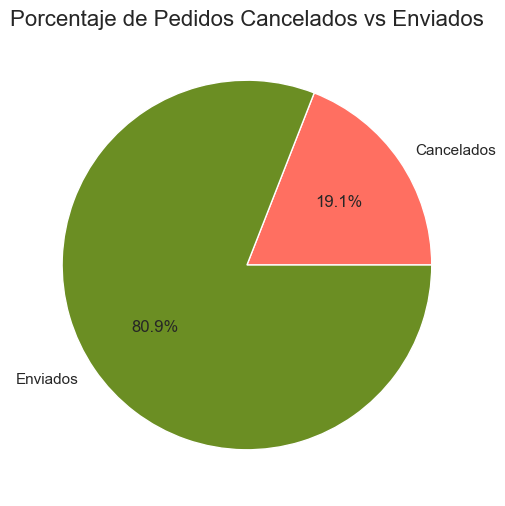

In [87]:
# 7. Porcentaje de pedidos cancelados vs enviados
status_counts = df['Status'].value_counts()
cancelled_percentage = (status_counts['Cancelled'] / status_counts.sum()) * 100
shipped_percentage = (status_counts['Shipped'] / status_counts.sum()) * 100

plt.figure(figsize=(6, 6))
plt.pie([cancelled_percentage, shipped_percentage],
        labels=['Cancelados', 'Enviados'],
        autopct='%1.1f%%',
        colors=['#FF6F61', '#6B8E23'])
plt.title('Porcentaje de Pedidos Cancelados vs Enviados', fontsize=16)
plt.show()

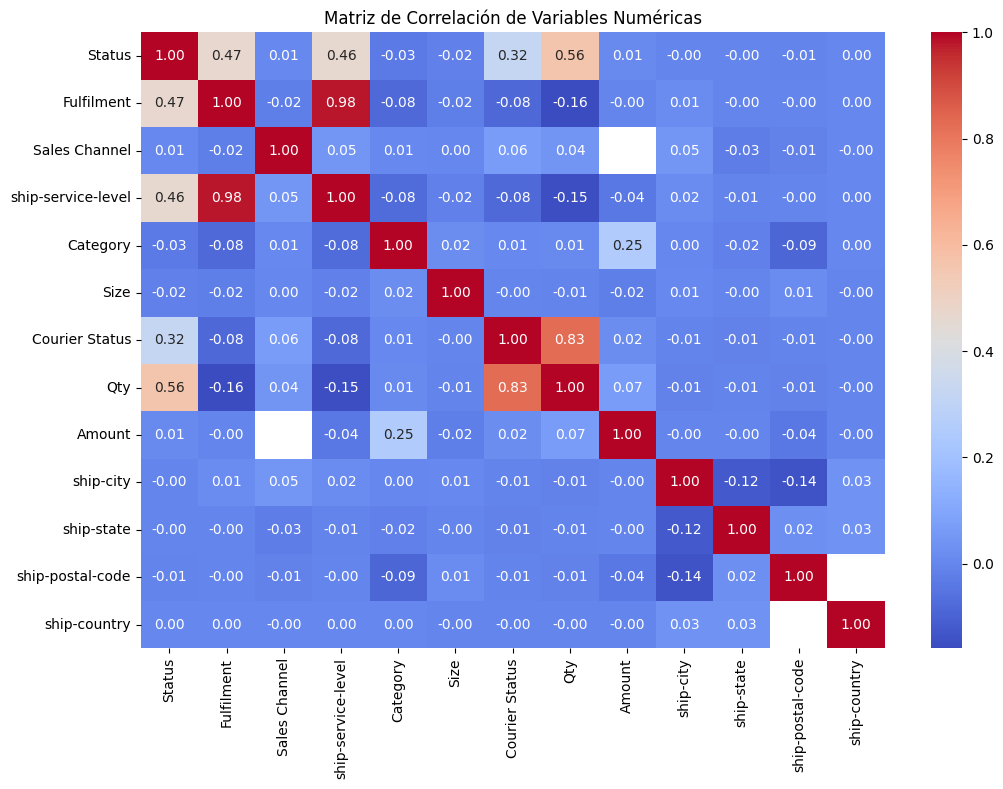

In [22]:
# Preprocesamiento de datos
# Aplicar LabelEncoder para convertir variables categóricas en numéricas
le = LabelEncoder()

# Convertir las columnas categóricas en numéricas
df['Status'] = le.fit_transform(df['Status'])
df['Fulfilment'] = le.fit_transform(df['Fulfilment'])
df['Sales Channel'] = le.fit_transform(df['Sales Channel'])
df['ship-service-level'] = le.fit_transform(df['ship-service-level'])
df['Category'] = le.fit_transform(df['Category'])
df['Size'] = le.fit_transform(df['Size'])
df['Courier Status'] = le.fit_transform(df['Courier Status'])
df['ship-city'] = le.fit_transform(df['ship-city'])
df['ship-state'] = le.fit_transform(df['ship-state'])
df['ship-country'] = le.fit_transform(df['ship-country'])

# Seleccionar solo las columnas numéricas para la matriz de correlación
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


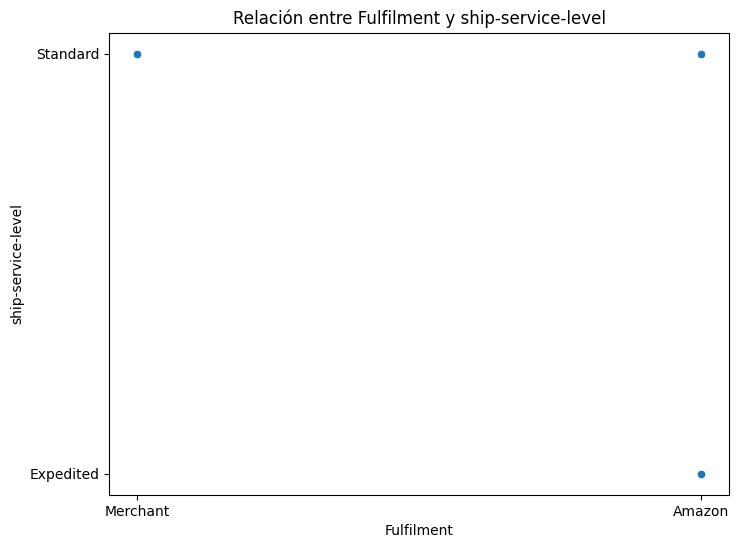

In [27]:
# Gráfico de dispersión entre 'Fulfilment' y 'ship-service-level'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Fulfilment', y='ship-service-level')
plt.title('Relación entre Fulfilment y ship-service-level')
plt.xlabel('Fulfilment')
plt.ylabel('ship-service-level')
plt.show()


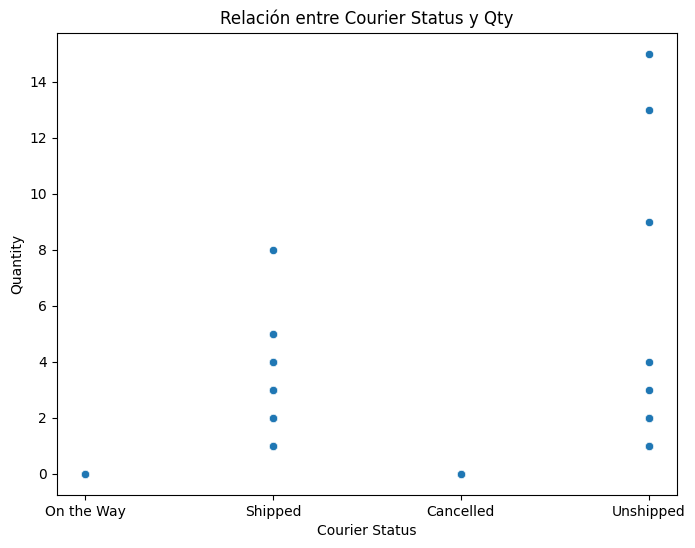

In [28]:
# Gráfico de dispersión entre 'Courier Status' y 'Qty'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Courier Status', y='Qty')
plt.title('Relación entre Courier Status y Qty')
plt.xlabel('Courier Status')
plt.ylabel('Quantity')
plt.show()


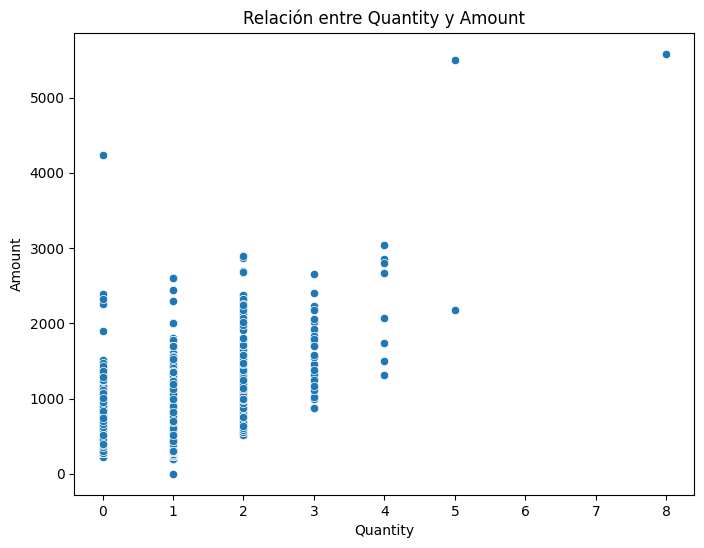

In [31]:
# Gráfico de dispersión entre 'Qty' y 'Amount'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Qty', y='Amount')
plt.title('Relación entre Quantity y Amount')
plt.xlabel('Quantity')
plt.ylabel('Amount')
plt.show()


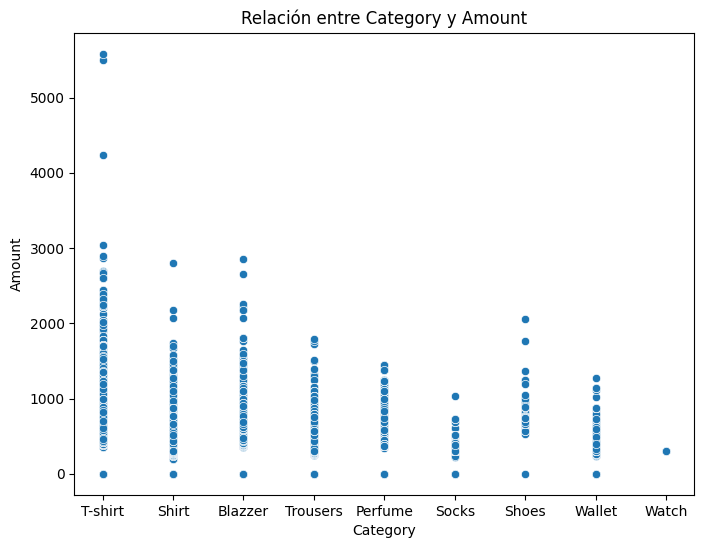

In [32]:
# Gráfico de dispersión entre 'Category' y 'Amount'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Category', y='Amount')
plt.title('Relación entre Category y Amount')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()


Boxplots iniciales:


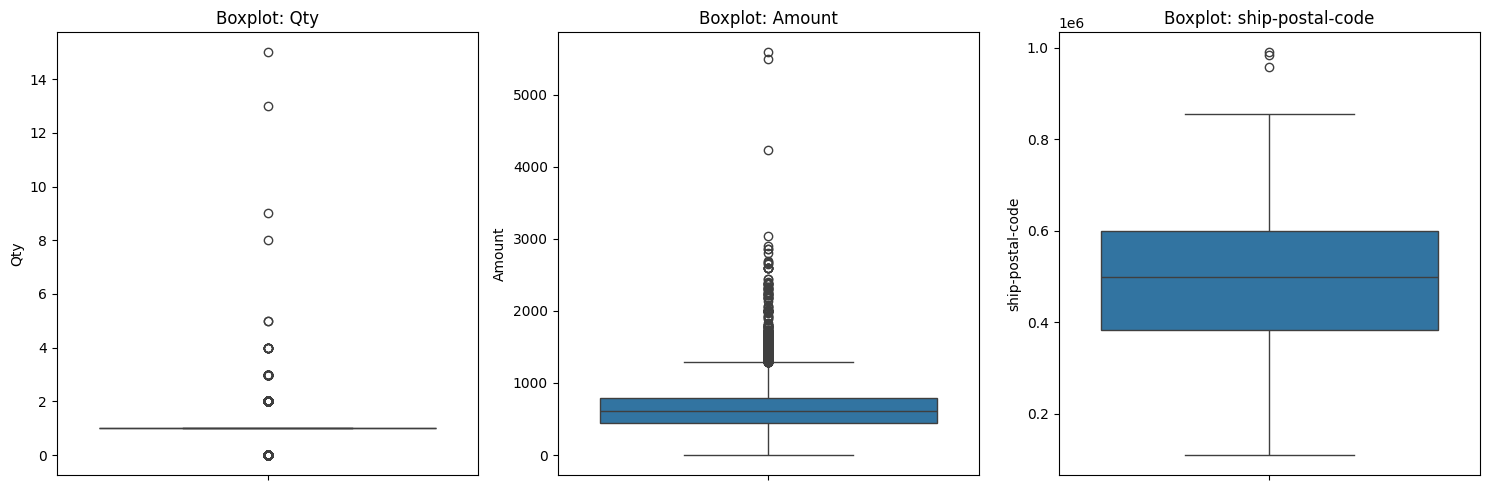

Qty - Límite inferior: 1.0, Límite superior: 1.0
Qty - Outliers detectados: 13197
Amount - Límite inferior: -59.5, Límite superior: 1296.5
Amount - Outliers detectados: 3601
ship-postal-code - Límite inferior: 56016.5, Límite superior: 926428.5
ship-postal-code - Outliers detectados: 3
Boxplots después del tratamiento:


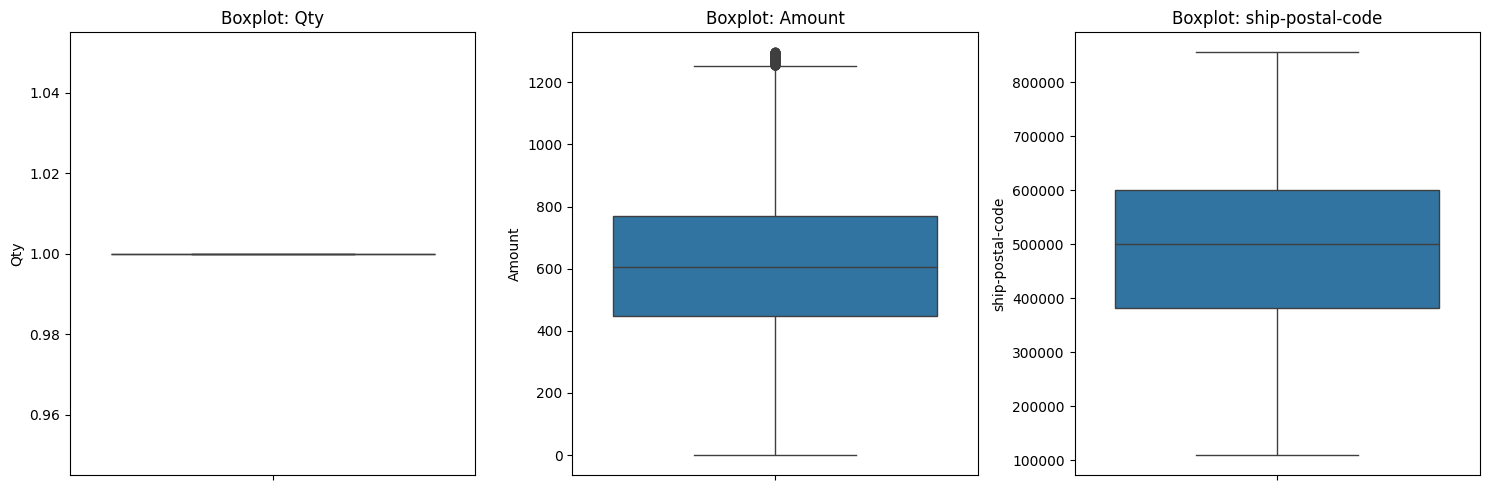

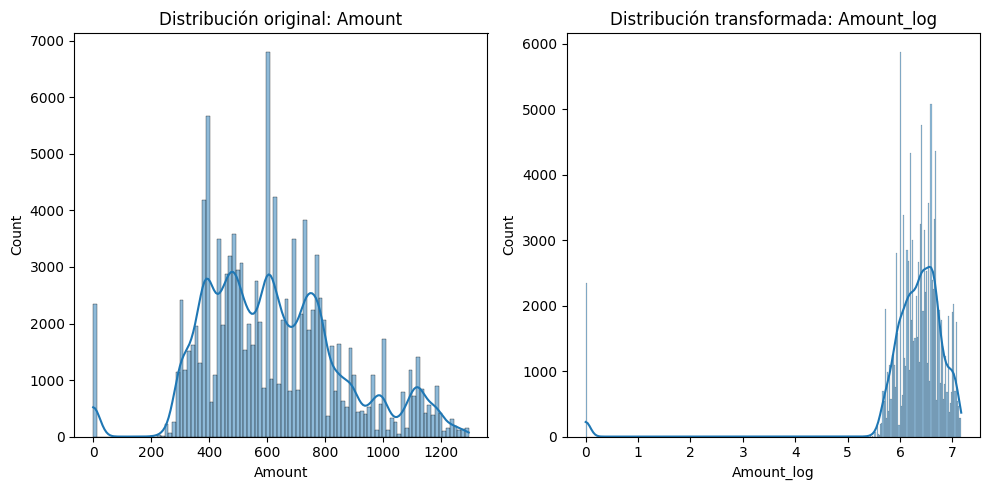

In [37]:
# Variables numéricas a analizar
numeric_columns = ['Qty', 'Amount', 'ship-postal-code']

# Función para identificar límites de outliers usando el método IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Visualización de outliers usando boxplots
def plot_boxplots(data, columns):
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(columns, start=1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(data[col])
        plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()

# Mostrar boxplots iniciales
print("Boxplots iniciales:")
plot_boxplots(df, numeric_columns)

# Identificar y manejar outliers
for column in numeric_columns:
    lower_bound, upper_bound = detect_outliers_iqr(df, column)
    print(f"{column} - Límite inferior: {lower_bound}, Límite superior: {upper_bound}")

    # Contar outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column} - Outliers detectados: {len(outliers)}")

    # Decidir tratamiento (reemplazar con mediana)
    median_value = df[column].median()
    df[column] = np.where(
        (df[column] < lower_bound) | (df[column] > upper_bound),
        median_value,
        df[column]
    )

# Mostrar boxplots después del tratamiento
print("Boxplots después del tratamiento:")
plot_boxplots(df, numeric_columns)

# Transformación logarítmica (opcional) para la variable 'Amount'
df['Amount_log'] = np.log1p(df['Amount'])  # log1p evita problemas con valores cero

# Visualizar la distribución antes y después de la transformación
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], kde=True)
plt.title('Distribución original: Amount')
plt.subplot(1, 2, 2)
sns.histplot(df['Amount_log'], kde=True)
plt.title('Distribución transformada: Amount_log')
plt.tight_layout()
plt.show()


Resumen de valores faltantes por columna:
                    Valores Faltantes  Porcentaje (%)
Order ID                            0        0.000000
Date                                0        0.000000
Status                              0        0.000000
Fulfilment                          0        0.000000
Sales Channel                       0        0.000000
ship-service-level                  0        0.000000
Category                            0        0.000000
Size                                0        0.000000
Courier Status                      0        0.000000
Qty                                 0        0.000000
currency                         7800        6.047637
Amount                           7800        6.047637
ship-city                           0        0.000000
ship-state                          0        0.000000
ship-postal-code                   35        0.027137
ship-country                        0        0.000000
B2B                                 0   

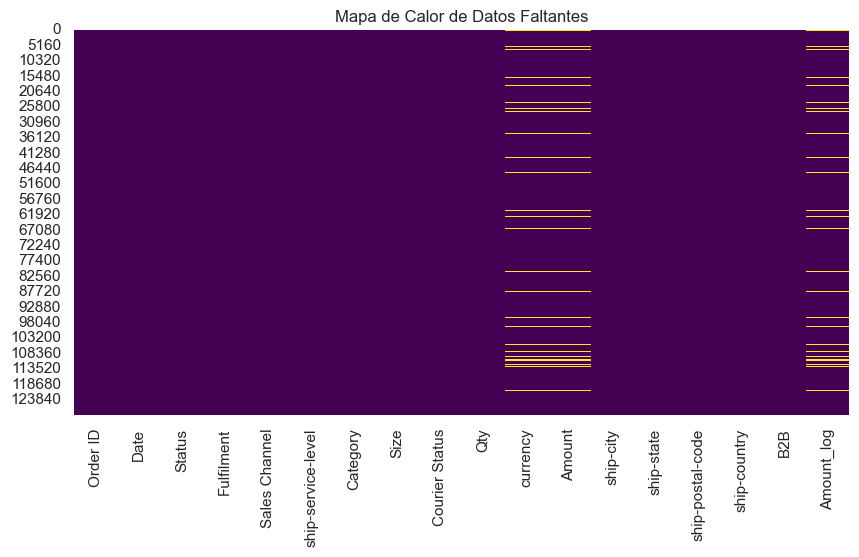

Columnas eliminadas (más del 50% de valores faltantes): []
Columna 'currency' imputada: moda.
Columna 'Amount' imputada: mediana.
Columna 'ship-postal-code' imputada: mediana.
Columna 'Amount_log' imputada: mediana.
Valores faltantes después del tratamiento:
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
Amount_log            0
dtype: int64


C:\Users\julia\AppData\Local\Temp\ipykernel_11304\1629205000.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[column].fillna(mode_value, inplace=True)
C:\Users\julia\AppData\Local\Temp\ipykernel_11304\1629205000.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

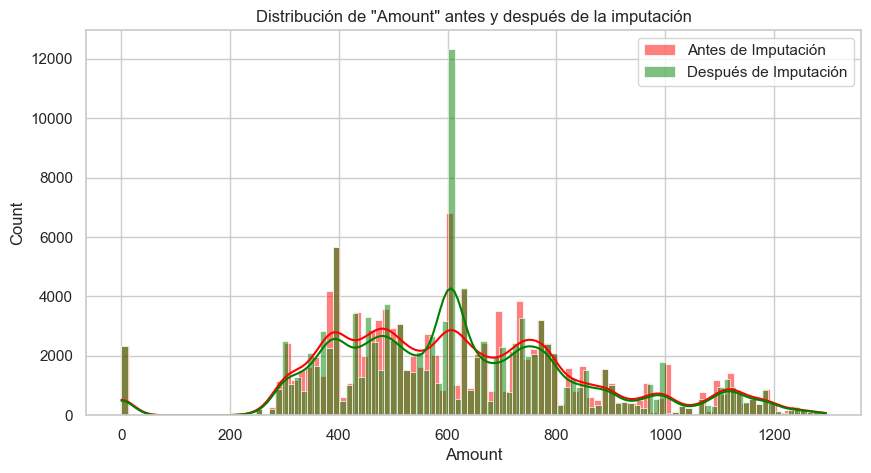

In [94]:
# Identificar valores faltantes
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({'Valores Faltantes': missing_data, 'Porcentaje (%)': missing_percentage})
print("Resumen de valores faltantes por columna:")
print(missing_summary)

# Visualización de valores faltantes con un mapa de calor
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes')
plt.show()

# Estrategia de tratamiento
# 1. Eliminar columnas con más del 50% de valores faltantes
threshold = 50  # Porcentaje
columns_to_drop = missing_summary[missing_summary['Porcentaje (%)'] > threshold].index
df_cleaned = df.drop(columns=columns_to_drop)
print(f"Columnas eliminadas (más del {threshold}% de valores faltantes): {list(columns_to_drop)}")

# 2. Imputar valores faltantes en las variables restantes
for column in df_cleaned.columns:
    if df_cleaned[column].isnull().sum() > 0:
        if df_cleaned[column].dtype == 'object':
            # Imputar con el valor más frecuente para variables categóricas
            mode_value = df_cleaned[column].mode()[0]
            df_cleaned[column].fillna(mode_value, inplace=True)
        else:
            # Imputar con la mediana para variables numéricas
            median_value = df_cleaned[column].median()
            df_cleaned[column].fillna(median_value, inplace=True)
        print(f"Columna '{column}' imputada: {'mediana' if df_cleaned[column].dtype != 'object' else 'moda'}.")

# Confirmar que ya no hay valores faltantes
print("Valores faltantes después del tratamiento:")
print(df_cleaned.isnull().sum())

# Visualización de la distribución de una variable imputada
# Ejemplo: 'Amount' (si tiene valores faltantes)
if 'Amount' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Amount'], kde=True, color='red', label='Antes de Imputación')
    sns.histplot(df_cleaned['Amount'], kde=True, color='green', label='Después de Imputación')
    plt.title('Distribución de "Amount" antes y después de la imputación')
    plt.legend()
    plt.show()

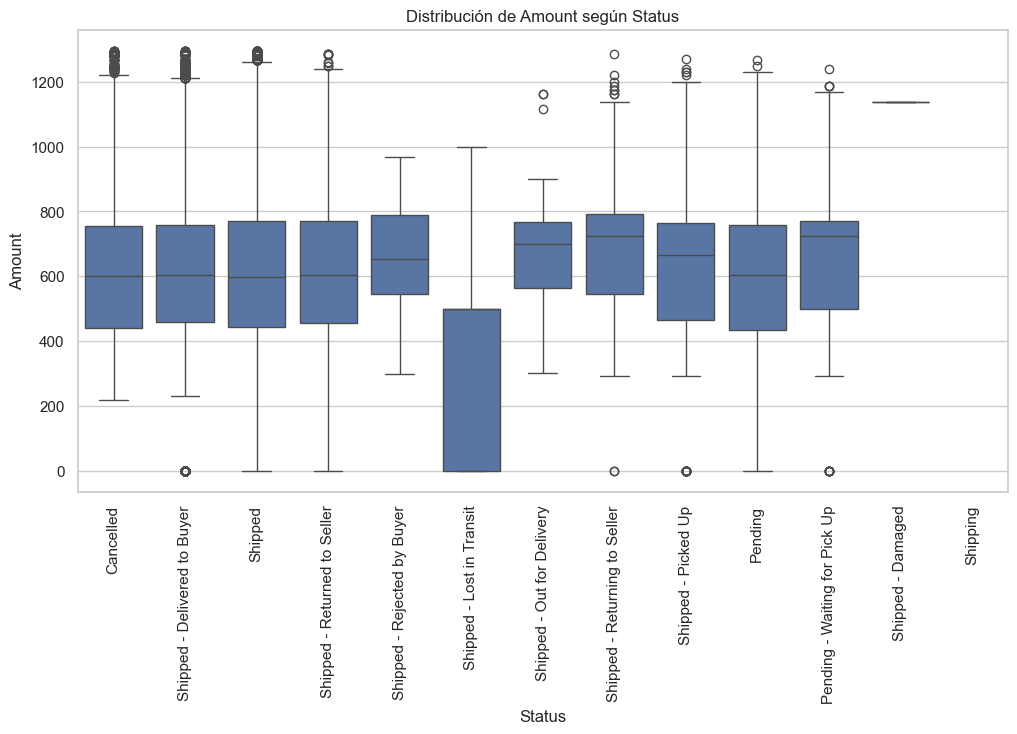

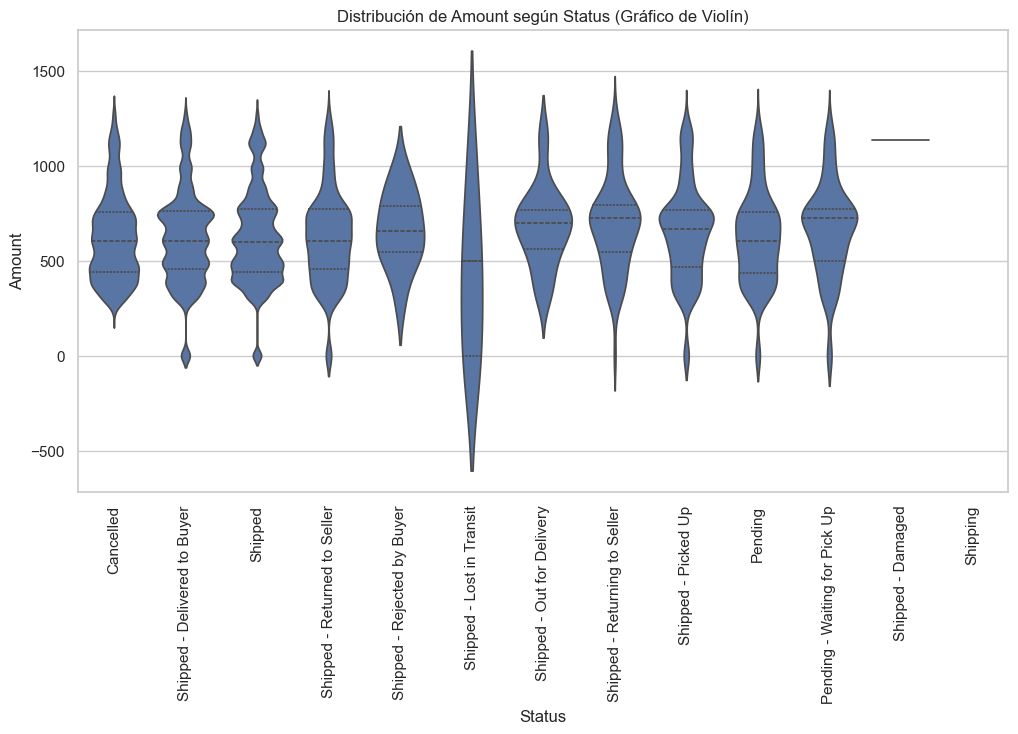

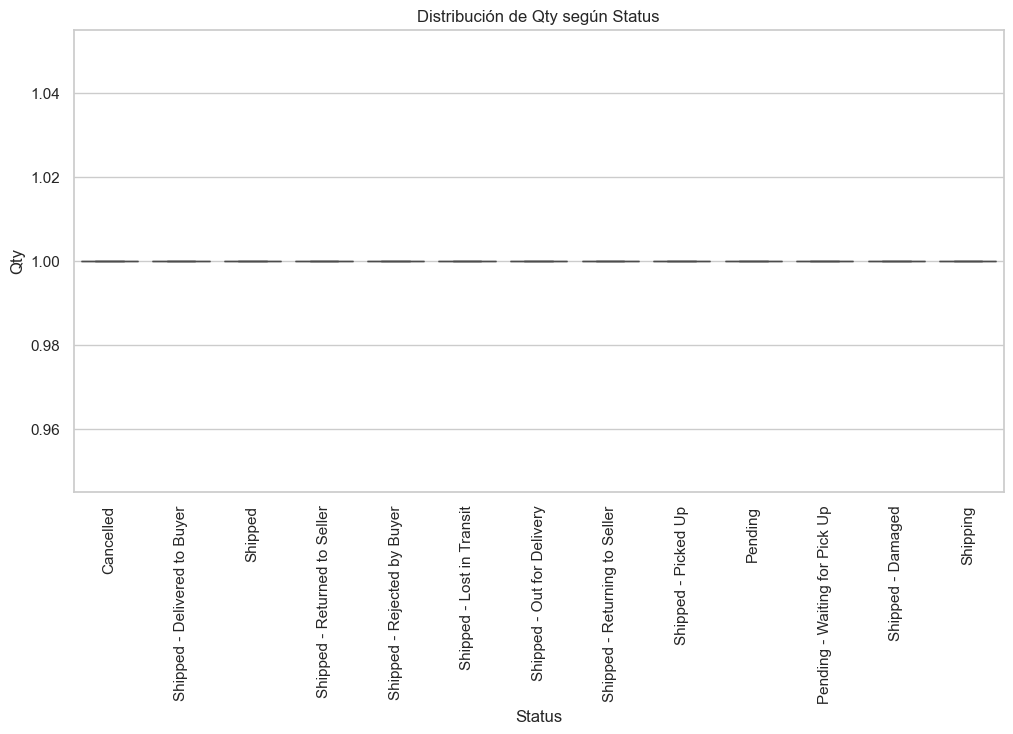

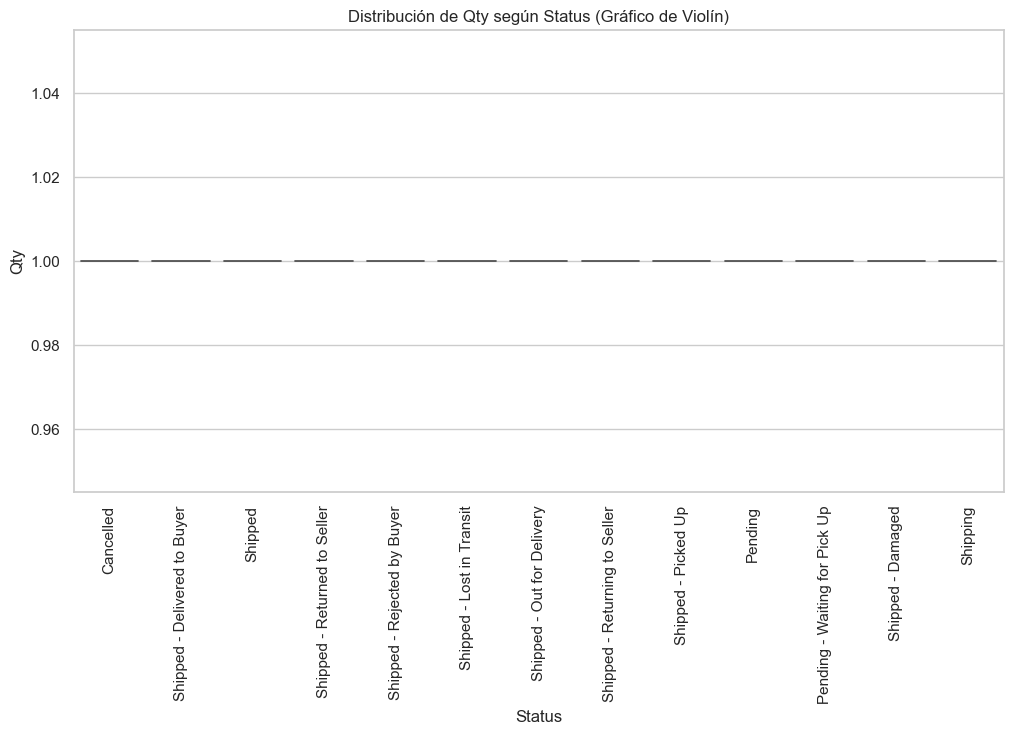

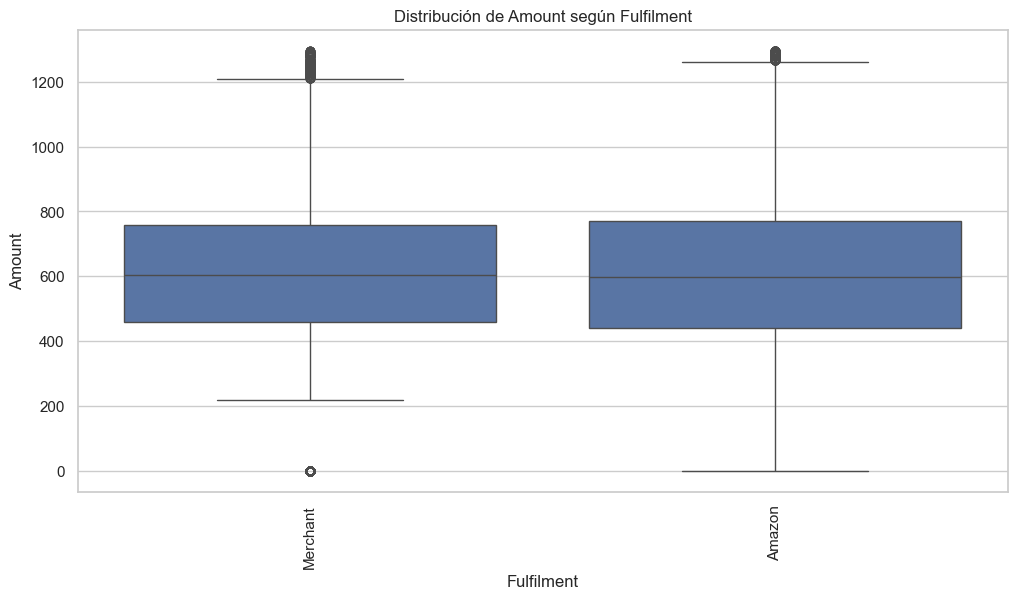

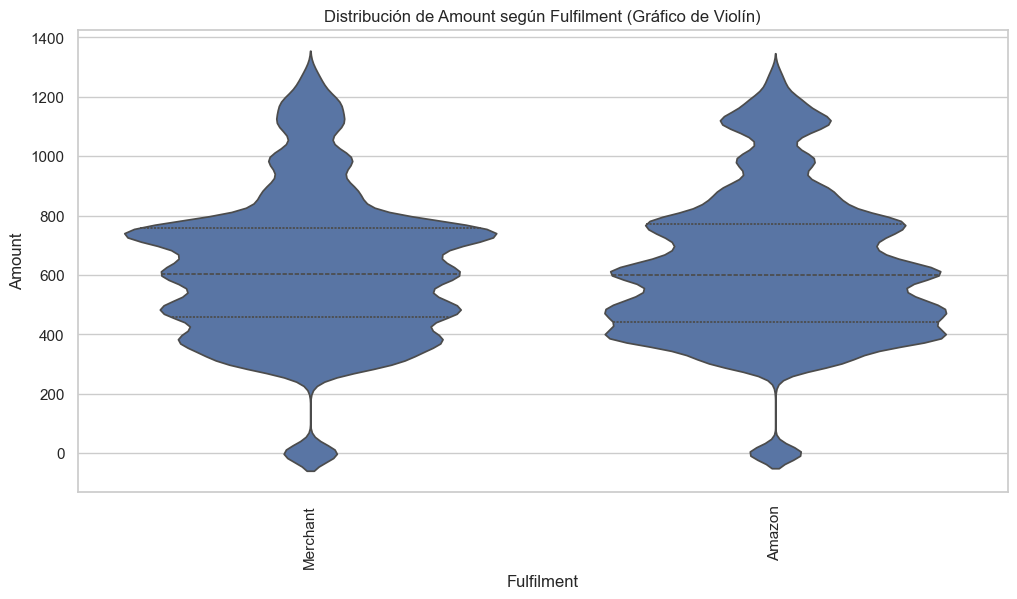

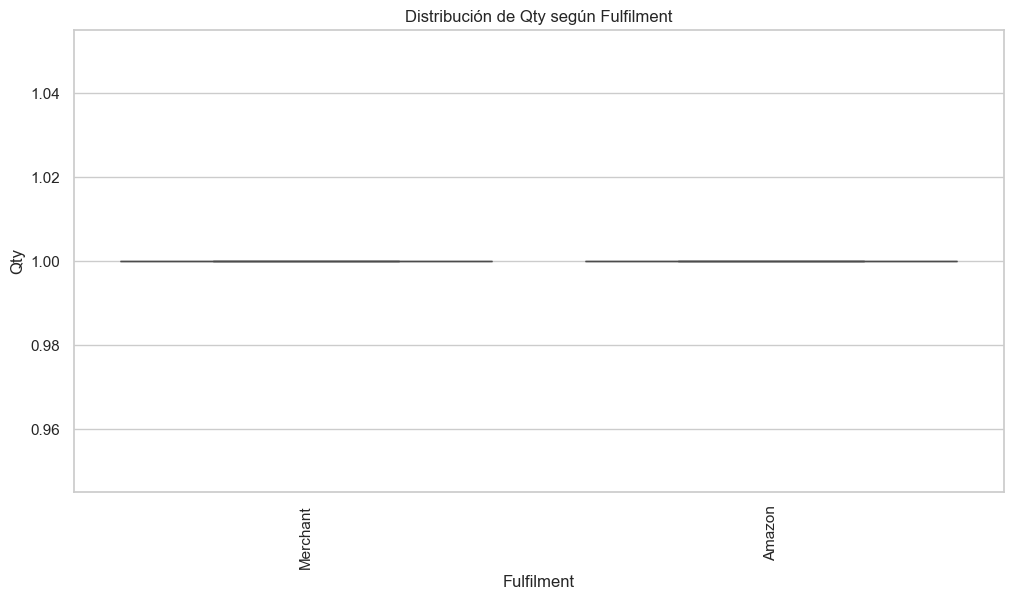

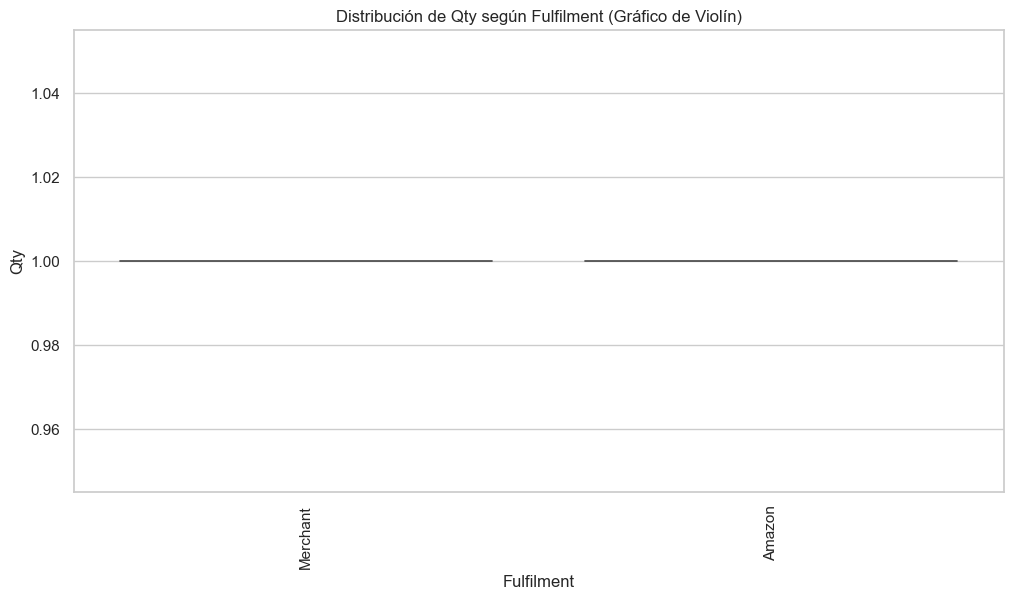

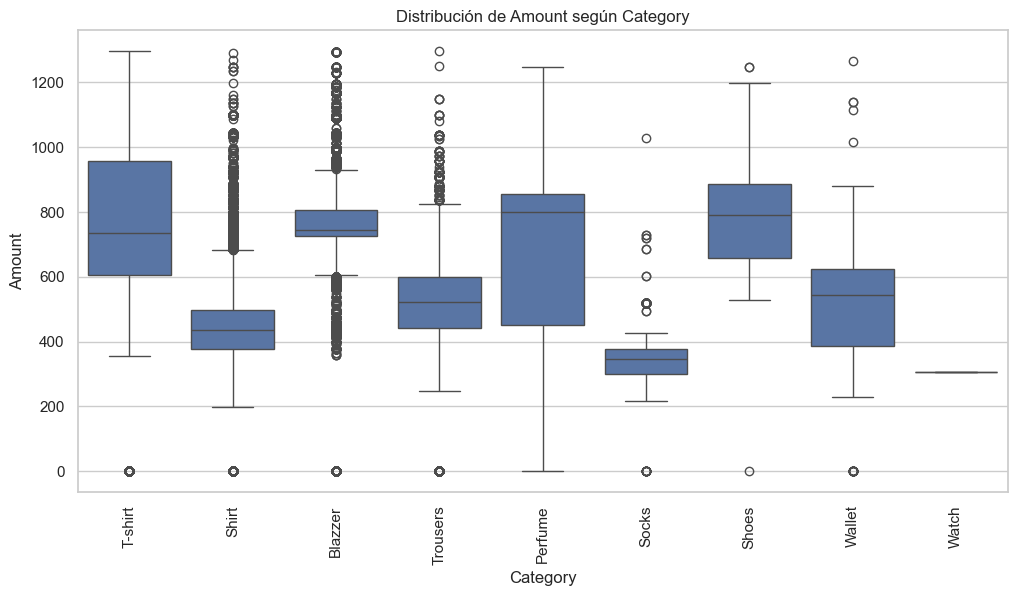

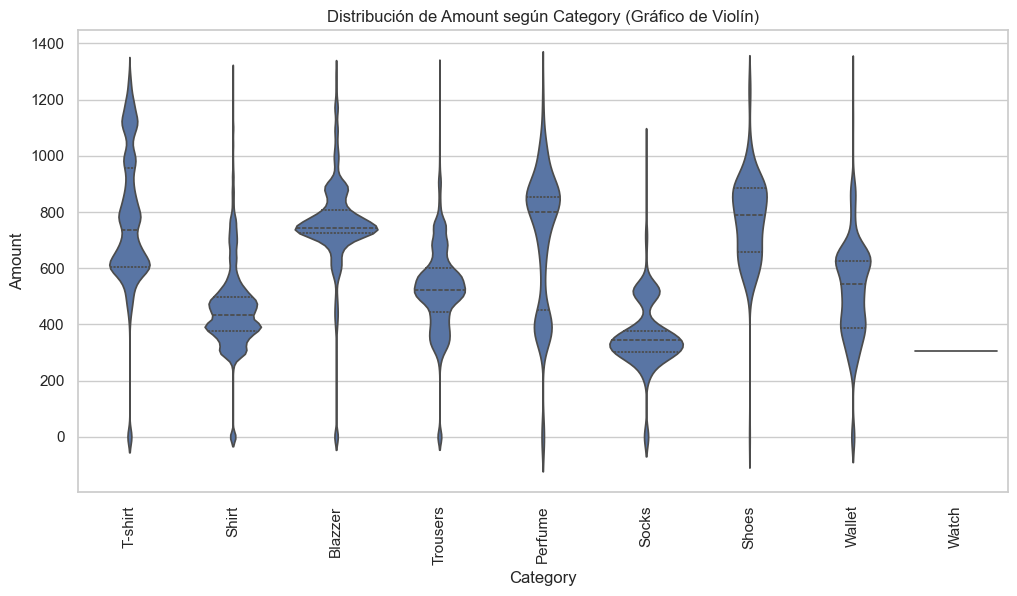

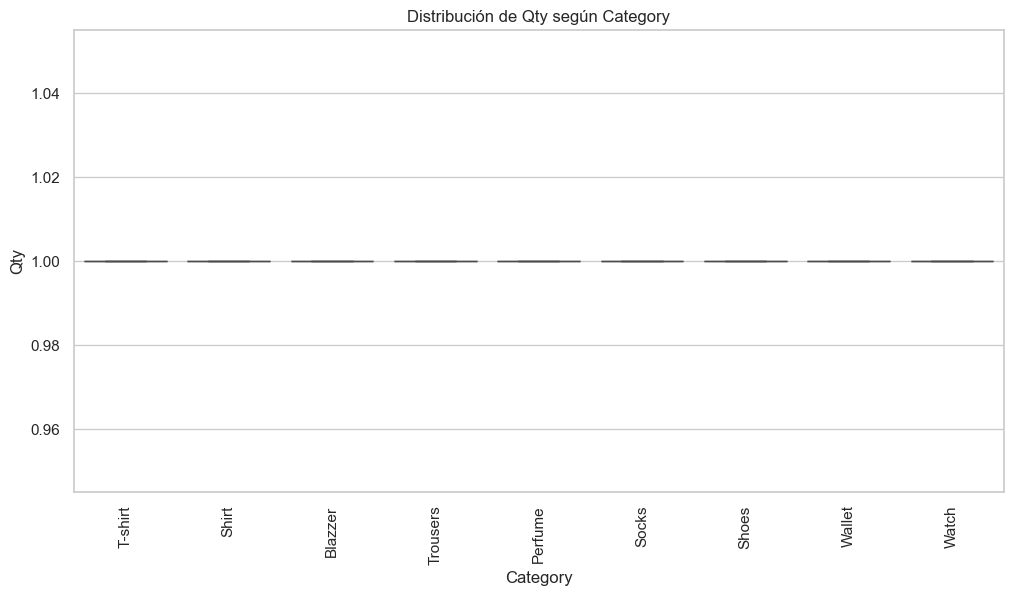

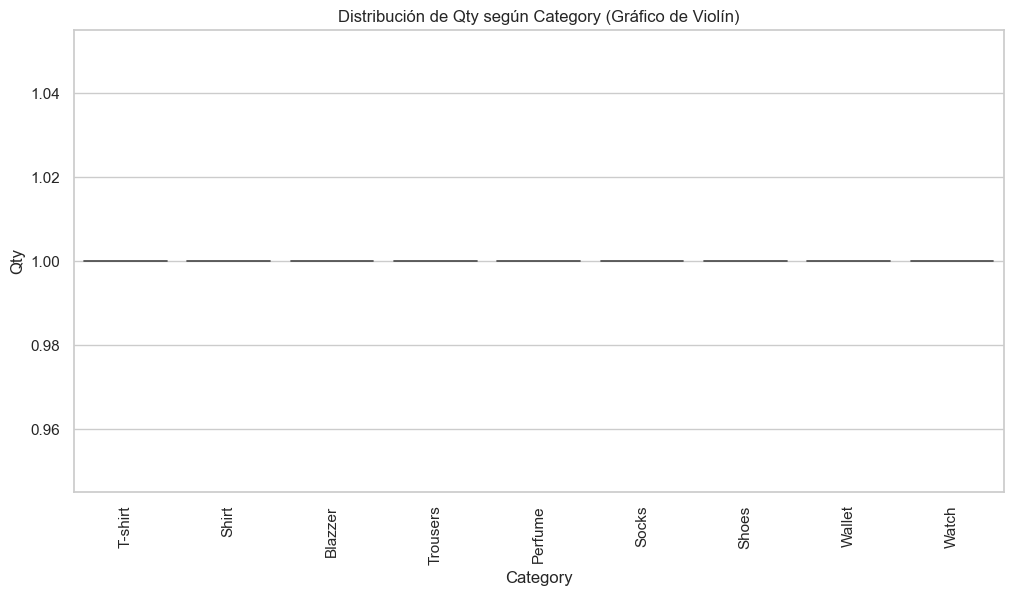

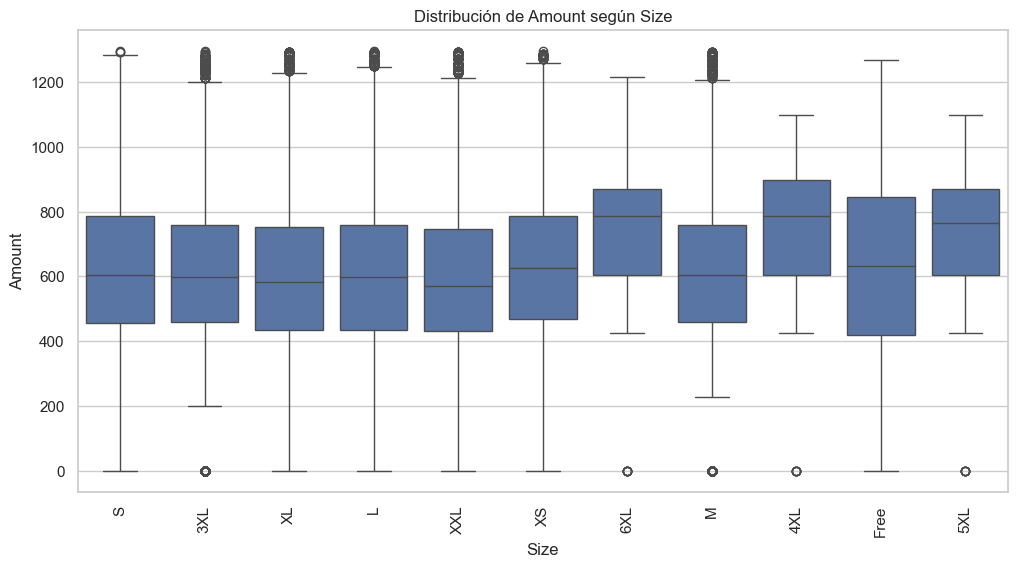

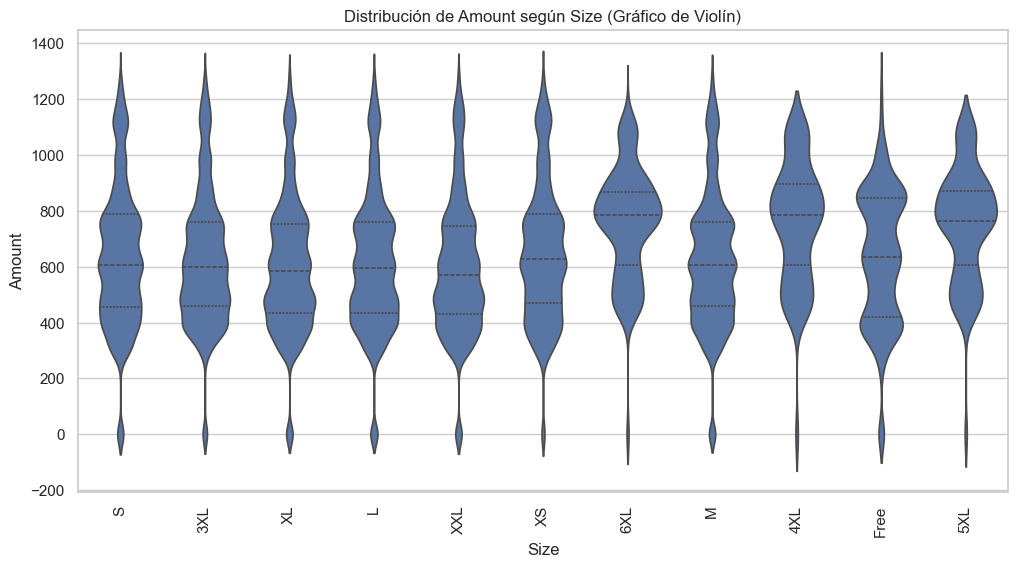

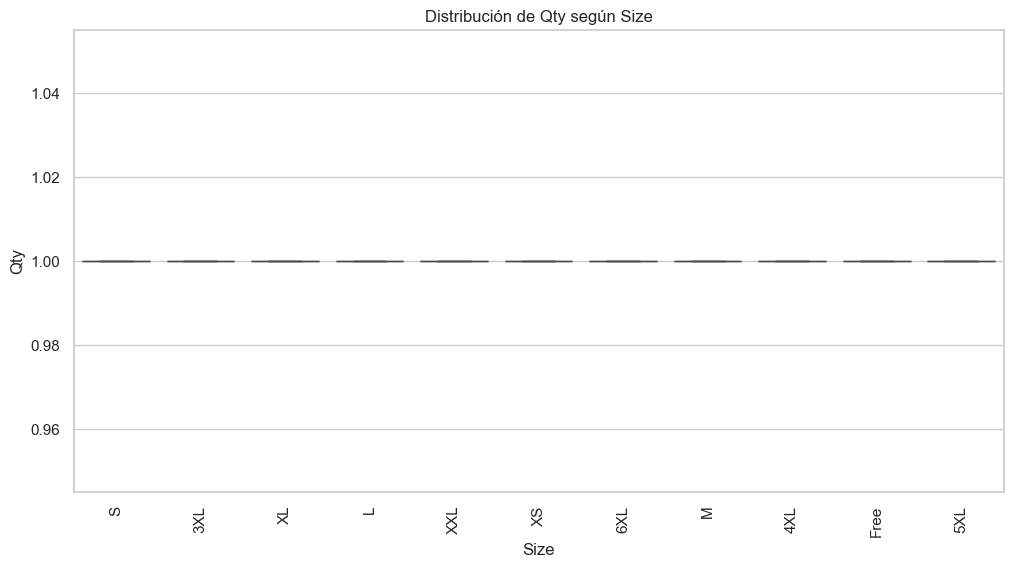

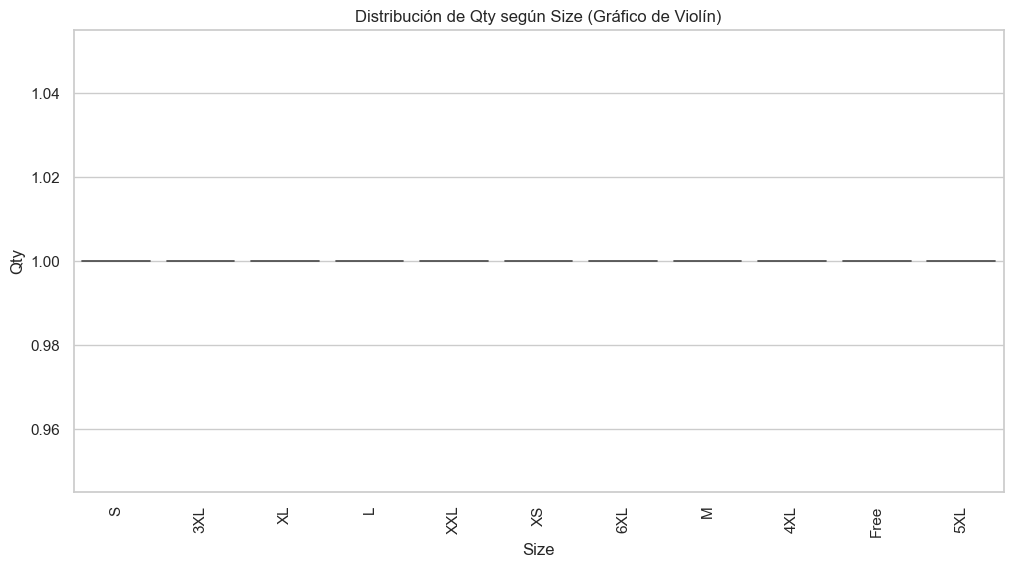

In [41]:
# Variables categóricas y numéricas
categorical_columns = ['Status', 'Fulfilment', 'Category', 'Size']
numerical_columns = ['Amount', 'Qty']

# Configurar el estilo de Seaborn (sin usar plt.style.use)
sns.set_theme(style="whitegrid")  # Configurar tema

# Generar gráficos
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        if cat_col in df.columns and num_col in df.columns:
            # Gráfico de caja
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=df, x=cat_col, y=num_col)
            plt.title(f'Distribución de {num_col} según {cat_col}')
            plt.xticks(rotation=90)
            
            plt.show()
            
            # Gráfico de violín
            plt.figure(figsize=(12, 6))
            sns.violinplot(data=df, x=cat_col, y=num_col, inner="quartile")
            plt.title(f'Distribución de {num_col} según {cat_col} (Gráfico de Violín)')
            plt.xticks(rotation=90)
            
            plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Modelo de árbol de decisión 
# Cargar el dataset
df = pd.read_csv('https://raw.githubusercontent.com/Jylians/introduc/refs/heads/main/Base_limpia.csv')

# Paso 1: Preprocesamiento
# Convertir columnas con valores nulos
df['Amount'].fillna(df['Amount'].median(), inplace=True)
df['Qty'].fillna(df['Qty'].median(), inplace=True)

# Codificar variables categóricas
label_encoder = LabelEncoder()
df['Fulfilment'] = label_encoder.fit_transform(df['Fulfilment'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Courier Status'] = label_encoder.fit_transform(df['Courier Status'])
df['currency'] = label_encoder.fit_transform(df['currency'])

# Limpiar valores nulos en la columna 'Status'
df['Status'] = df['Status'].map({'Cancelled': 1, 'Shipped': 0})  # Cancelado = 1, No Cancelado = 0
df.dropna(subset=['Status'], inplace=True)  # Eliminar filas con valores nulos en la variable objetivo

# Paso 2: Dividir el dataset en características (X) y variable objetivo (y)
X = df[['Amount', 'Qty', 'Fulfilment', 'Category', 'Courier Status']]  # Variables predictoras
y = df['Status']  # Variable objetivo (cancelación de pedidos)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 3: Entrenar un modelo de árbol de decisión
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9992026347720575
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     23283
         1.0       1.00      1.00      1.00      5562

    accuracy                           1.00     28845
   macro avg       1.00      1.00      1.00     28845
weighted avg       1.00      1.00      1.00     28845



C:\Users\julia\AppData\Local\Temp\ipykernel_14984\3202140607.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].median(), inplace=True)
C:\Users\julia\AppData\Local\Temp\ipykernel_14984\3202140607.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy